In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
pclass = ctrl.Antecedent(np.arange(0, 5, 1), 'pclass')
fare = ctrl.Antecedent(np.arange(0, 513, 1), 'fare')
age = ctrl.Antecedent(np.arange(0, 81, 1), 'age')

survived = ctrl.Consequent(np.arange(0,2,1), 'survived')

In [ ]:
pclass.automf(3)
fare.automf(3)
age.automf(3)


In [ ]:
survived['die'] = fuzz.trimf(survived.universe,[0,0,1])
survived['survivor'] = fuzz.trimf(survived.universe,[0,1,2])
survived.view()

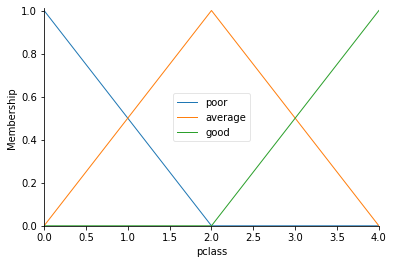

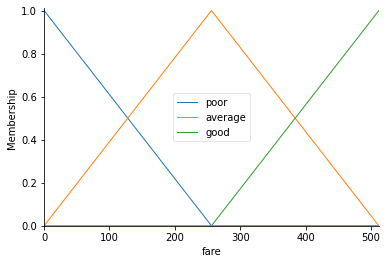

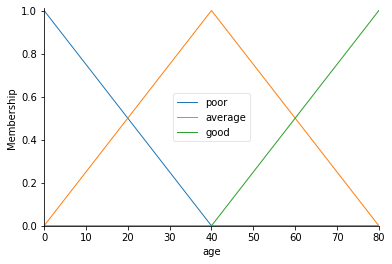

In [ ]:
pclass.view()
fare.view()
age.view()


In [ ]:
rule1 = ctrl.Rule(pclass['good'] & fare['poor']  & age ['average'] , survived['die'])
rule2 = ctrl.Rule(pclass['poor'] & fare['poor'] & age ['average'], survived['survivor'])
rule3 = ctrl.Rule(pclass['good'] & fare['poor'] &age ['average'], survived['survivor'])
rule4 = ctrl.Rule(pclass['poor'] & fare['poor'] &age ['average'], survived['survivor'])
rule5 = ctrl.Rule(pclass['good'] & fare['poor'] &age ['average'], survived['survivor'])
rule6 = ctrl.Rule(pclass['good'] & fare['poor'] &age ['average'], survived['survivor'])
rule7 = ctrl.Rule(pclass['poor'] & fare['poor'] &age ['average'], survived['survivor'])
rule8 = ctrl.Rule(pclass['good'] & fare['poor'] &age ['poor'], survived['survivor'])
rule9 = ctrl.Rule(pclass['good'] & fare['poor'] &age ['average'], survived['survivor'])
rule10 = ctrl.Rule(pclass['average'] & fare['poor']&age ['poor'], survived['survivor'])
rule11 = ctrl.Rule(pclass['average'] & fare['poor'] &age ['average'], survived['die'])
rule12 = ctrl.Rule(pclass['poor'] & fare['poor'] &age ['poor'], survived['survivor'])
rule13 = ctrl.Rule(pclass['good'] & fare['poor'] &age ['poor'], survived['die'])
rule14 = ctrl.Rule(pclass['poor'] & fare['poor'] &age ['average'], survived['survivor'])


In [ ]:
surviving_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14])

In [ ]:
surviving = ctrl.ControlSystemSimulation(surviving_ctrl)

In [ ]:
surviving.input['pclass'] = 3
surviving.input['fare'] = 7.25
surviving.input['age'] = 22
surviving.compute()

In [ ]:
print (surviving.output['survived'])

0.5


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
titanic_data = pd.read_csv("/content/gdrive/MyDrive/train.csv")

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
